# User set : 
### `BaseDir`, `ProblemDir`, `OptionDir`', `FileIndex` ,`nSpecies`
and `Filenamebase` if needed

In [1]:
BaseDir    = '/Users/ranchu/FLASHOR/Movies_n_Data/dele_1D_2S/Chimera_S25_100ms_Fluid/'
ProblemDir = 'CS25100ms_BTr_KS' # will be used as title
OptionDir  = '/48X40E_1_12_LS220' 

FileIndex       = [600] # need to be a list
nSpecies        = 2

# default
FileNameBase  = '/deleptonizationwave_hdf5_chk_'
Directory     = [BaseDir + ProblemDir + OptionDir] # can be different for a list
Directory     = Directory * len(FileIndex)

## Load library, search and read-in data ...

In [2]:
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import flashytlib.io as fyio
import flashytlib.io_basis as fyiobasis
import numpy as np

# assemble filename
[fnum, FullFileNames] \
= fyiobasis.IO_AssembleFileName(Directory,FileNameBase,FileIndex)
# read data
[Times, Energy, Radius, ZerothMoment, FirstMoment, NumberDensity, EnergyDensity, \
            FluxDensity, AverageEnergy, AverageFluxFactor, Luminosity ] \
= fyio.IO_GetMoments_n_ComputeMeanVars(FullFileNames,Directory, nSpecies)


shape Times  [nfum] (1,)
shape Energy [nfum,nE] (1, 40)
shape Radius [nfum,nR] (1, 768)
shape NumbDe [nfum,nS,nR] (1, 2, 768)


# Making plots ...
### Rho-T-Ye plot:

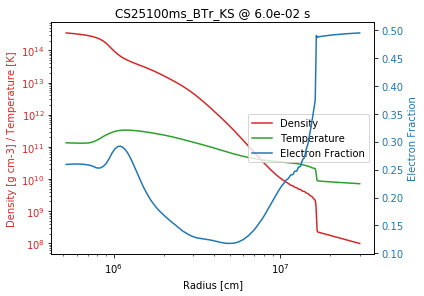

In [3]:
# rho-T-Ye
indexfile_plot = 0

%matplotlib inline
import flashytlib.plot as fyplt
fyplt.plt_1D_Eos(FullFileNames[indexfile_plot],\
                 optional_title=ProblemDir+' @ {:.1e} s'.format(Times[indexfile_plot]))

### Lumonosity:

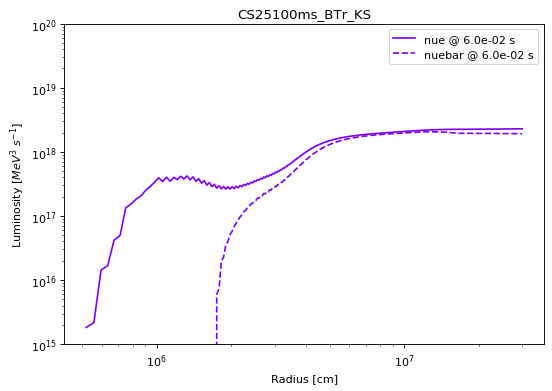

In [4]:
# luminosities
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

labels = ['nue','nuebar']
LineType     = ['solid','dashed']
colors = cm.rainbow(np.linspace(0, 1, len(Times))) # color for times/file

fig, ax1 = plt.subplots(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel(r'Luminosity [$MeV^3$ $s^{-1}$]')

for ifile in range(fnum):
    for iS in range(nSpecies):
        ax1.plot(Radius[ifile],Luminosity[ifile][iS],\
                 linestyle=LineType[iS],color=colors[ifile],\
                 label=labels[iS]+' @ {:.1e} s'.format(Times[ifile]))
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1.0e15, 1.0e20])
ax1.tick_params(axis='y')
ax1.set_title(ProblemDir)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='best')

plt.show()


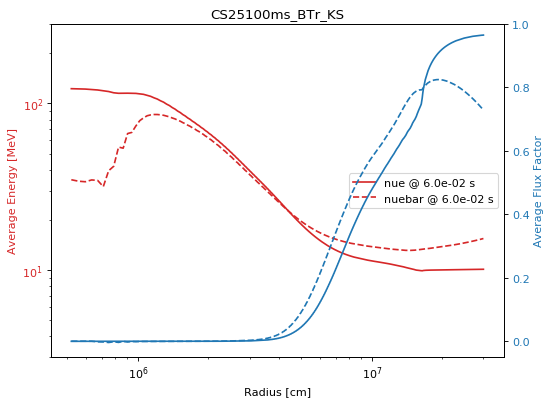

In [5]:
# Number Density & Average Flux Factor

import matplotlib.pyplot as plt

labels = ['nue','nuebar']
LineType     = ['solid','dashed']


fig, ax1 = plt.subplots(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Average Energy [MeV]',color=color)

for ifile in range(fnum):
    for iS in range(nSpecies):
        ax1.plot(Radius[ifile],AverageEnergy[ifile][iS],\
                 linestyle=LineType[iS],color=color,\
                 label=labels[iS]+' @ {:.1e} s'.format(Times[ifile]))

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([3.0e0, 3.0e2])
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Flux Factor', color=color)
ax2.plot(Radius,np.linspace(0.0,0.0,num=(len(Radius))),'-',color='grey')
for ifile in range(fnum):
    for iS in range(nSpecies):
        ax2.plot(Radius[ifile],AverageFluxFactor[ifile][iS],\
                 linestyle=LineType[iS],color=color,\
                 label=labels[iS]+' @ {:.1e} s'.format(Times[ifile]))

ax2.set_yscale('linear')
ax2.set_ylim([-0.05, 1.0])
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='right')
ax1.set_title(ProblemDir)

plt.show()

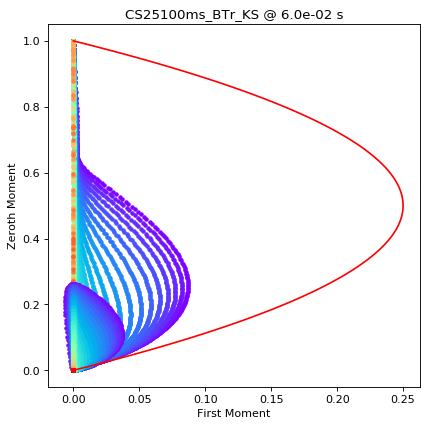

In [6]:
# Realizability

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = cm.rainbow(np.linspace(0, 1, len(Energy[0])))
fig, ax1 = plt.subplots(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

for ifile in range(fnum):
    for iS in range(nSpecies):
        for ie in range(len(Energy[0])):
            ax1.plot(FirstMoment[ifile][iS][:,ie],ZerothMoment[ifile][iS][:,ie],\
                 '.',color=colors[ie] )
    

yy = np.linspace(0, 1, 100)
xxP_FD = np.multiply(yy,1-yy)
ax1.plot(xxP_FD,yy,color='red')
ax1.set_xlabel('First Moment')
ax1.set_ylabel('Zeroth Moment')

ax1.set_title(ProblemDir+' @ {:.1e} s'.format(Times[0]))
plt.show()

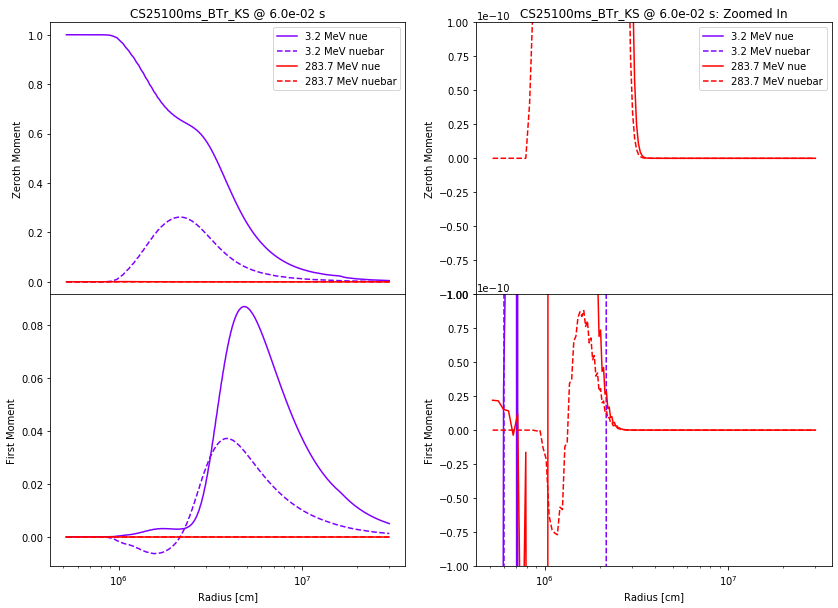

In [38]:
# Lowest energetic & Highest energetic J / H vs Radius
iEs = [0, len(Energy[0])-1]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

LineType     = ['solid','dashed']
labels = ['nue','nuebar']

colors = cm.rainbow(np.linspace(0, 1, len(Energy[0])))

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(14, 10))
for iE1 in iEs:
    for iS in range(nSpecies):
        for ip in range(2):
            axs[0][ip].plot(Radius[0],ZerothMoment[0][iS][:,iE1],\
                        linestyle=LineType[iS],color=colors[iE1],\
                        label= '%.1f MeV '%(Energy[0][iE1])+labels[iS])
            axs[1][ip].plot(Radius[0],FirstMoment[0][iS][:,iE1],\
                        linestyle=LineType[iS],color=colors[iE1],\
                        label= '%.1f MeV '%(Energy[0][iE1])+labels[iS])

axs[0][0].set_ylabel('Zeroth Moment')
axs[1][0].set_ylabel('First Moment')
axs[1][0].set_xlabel('Radius [cm]')
axs[1][0].set_xscale('log')
axs[0][0].legend(loc='best')

axs[0][1].set_ylabel('Zeroth Moment')
axs[1][1].set_ylabel('First Moment')
axs[1][1].set_xlabel('Radius [cm]')
axs[1][1].set_xscale('log')
axs[0][1].set_ylim([-1.0e-10, 1.0e-10])
axs[1][1].set_ylim([-1.0e-10, 1.0e-10])
axs[0][1].legend(loc='best')

axs[0][0].set_title(ProblemDir+' @ {:.1e} s'.format(Times[0]))
axs[0][1].set_title(ProblemDir+' @ {:.1e} s'.format(Times[0])+': Zoomed In')
plt.show()

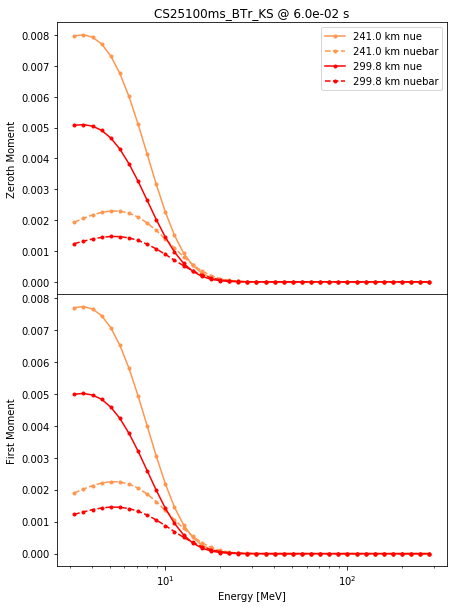

In [29]:
# J / H in spectrum for given radius
iXs = [int(len(Radius[0])*0.8),len(Radius[0])-1]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

LineType     = ['solid','dashed']
labels = ['nue','nuebar']

colors = cm.rainbow(np.linspace(0, 1, len(Radius[0])))

fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0},\
                       figsize=(7, 10))

for iX in iXs:
    for iS in range(nSpecies):
        axs[0].plot(Energy[0],ZerothMoment[0][iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    marker='.',\
                    label= '%.1f km '%(Radius[0][iX]*1.0e-5)+labels[iS])
        axs[1].plot(Energy[0],FirstMoment[0][iS][iX,:],\
                    linestyle=LineType[iS],color=colors[iX],\
                    marker='.',\
                    label= '%.1f km '%(Radius[0][iX]*1.0e-5)+labels[iS])

axs[0].set_ylabel('Zeroth Moment')
axs[1].set_ylabel('First Moment')
axs[1].set_xlabel('Energy [MeV]')
axs[1].set_xscale('log')
axs[0].legend(loc='best')

axs[0].set_title(ProblemDir+' @ {:.1e} s'.format(Times[0]))
plt.show()